In [304]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [5]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [6]:
import collect_stats as cs

In [3]:
filenames = [
    'HOXC4_R158L_R1_8mers.txt',
    'HOXD13_REF_R1_8mers.txt',
    'GFI1_REF_R1_8mers.txt',
    'HOXC4_R158L_R2_8mers.txt',
    'PAX4_REF_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'POU3F4_V322M_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'HOXB7_R189C_R1_8mers.txt',
    'CRX_R90W_R1_8mers.txt',
]

In [176]:
mves = cs.get_data_mves('/cluster/sj1/bb_opt', 'mves_1_')

reading sample 1
reading sample 2
reading sample 3


In [ ]:
mves2 = cs.get_data_mves('/cluster/sj1/bb_opt', 'mves_2_')

In [ ]:
pdts = cs.get_data_mves('/cluster/sj1/bb_opt', 'pdts_dna_n')

In [ ]:
pdts_mix = cs.get_data_mves('/cluster/sj1/bb_opt', 'pdts_dna_cond_n')

In [ ]:
mves_ei_mix = cs.get_data_mves('/cluster/sj1/bb_opt', 'ei_mves_mix')

In [ ]:
mves_condense = cs.get_data_mves('/cluster/sj1/bb_opt', 'cond_ei_test')

In [334]:
cut_mves = cs.get_data_mves('/cluster/sj1/bb_opt', 'cut_mves_1_', num_samples=20)

reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16


In [346]:
ucb = cs.get_data_ucb('/cluster/sj1/bb_opt', 'n')

reading 0
read 9 samples
reading 1
read 0 samples
reading 2
read 10 samples
reading 3
read 0 samples
reading 4
read 0 samples


In [347]:
er_pdts_mix = cs.get_data_mves('/cluster/sj1/bb_opt', 'er_pdts_mix_1_')

reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9


In [ ]:
mix_200 = cs.get_data_mves('/cluster/sj1/bb_opt', 'er_mves_mix_200_samples_')

In [ ]:
hardmix_200 = cs.get_data_mves('/cluster/sj1/bb_opt', 'er_mves_hardmix_200_samples_')

In [348]:
batch_idx = 1
ack_iter_idx = -1
stat_idx = -4

In [349]:
arrs = {
    'mves_er_mix' : mves_ei_mix,
    'mves2': mves2,
    'mves': mves,
    'pdts*2': pdts_mix,
    'pdts': pdts,
    'er*2': mves_condense,
    'mix_200': mix_200,
    'hardmix_200': hardmix_200,
    'er_pdts_mix': er_pdts_mix,
    'cut_mves' : cut_mves,
       }
for f in filenames:
    print(f)
    for k in arrs:
        try:
            arr = arrs[k][f][batch_idx]
            arr_top = arr[:, ack_iter_idx, stat_idx]
            print(k+':', arr.shape[0], np.mean(arr_top), np.median(arr_top), np.std(arr_top), np.max(arr_top), np.median(arr[:, ack_iter_idx, -5]))
        except Exception as e:
            pass

    ucb_coeffs = [0.0, 0.5, 1.0, 2.0, 3.0]
    for i in range(5):
        try:
            if len(ucb[i][f][batch_idx]) != 0:
                arr = ucb[i][f][batch_idx]
                arr_top = arr[:, ack_iter_idx, stat_idx]
                print('ucb:', ucb_coeffs[i], arr.shape[0], np.mean(arr_top), np.median(arr_top), np.std(arr_top), np.median(arr[:, ack_iter_idx, -5]))
        except Exception as e:
            pass

HOXC4_R158L_R1_8mers.txt
mves_er_mix: 3 0.16565041 0.17073171 0.014154871 0.17987806 68971.82
mves2: 2 0.11890244 0.11890244 0.02743902 0.14634146 58559.36
mves: 2 0.12804878 0.12804878 0.024390247 0.15243903 59612.258
pdts*2: 10 0.12042682 0.12042683 0.017738037 0.14939025 67918.92
pdts: 10 0.15365854 0.1554878 0.020686826 0.18597561 66866.02
er*2: 5 0.16219512 0.16158536 0.021245426 0.19512194 66866.02
mix_200: 4 0.15929878 0.16463414 0.013698324 0.17073171 66866.02
hardmix_200: 9 0.1561653 0.16463415 0.012674995 0.16768293 68971.82
er_pdts_mix: 9 0.14735773 0.14634146 0.018628359 0.17073171 68971.82
cut_mves: 14 0.13436411 0.1402439 0.018454004 0.15853658 58559.36
ucb: 0.0 9 0.1409214 0.14329268 0.008833608 68971.82
ucb: 1.0 10 0.1582317 0.16006097 0.014001173 68971.82
HOXD13_REF_R1_8mers.txt
mves_er_mix: 3 0.16463415 0.17073171 0.010850686 0.17378049 149168.34
mves: 2 0.12804878 0.12804878 0.0060975626 0.13414635 146556.81
pdts*2: 10 0.11189024 0.11432926 0.015428757 0.1402439 1581

In [311]:
batch_idx = 1
ack_iter_idx = -1
stat_idx = -4
f = filenames[2]
t = 'cut_mves'

In [314]:
print(getattr(sys.modules[__name__], t)[f][batch_idx][:, ack_iter_idx, stat_idx])
print(ucb[0][f][batch_idx][:, ack_iter_idx, stat_idx])

[0.08841463 0.12195122 0.         0.1097561  0.02439024 0.08536585
 0.14939025 0.08231708 0.07317073 0.09146342 0.07317073 0.
 0.08841463 0.09451219 0.07317073 0.10670732]
[0.09146342 0.06707317 0.11890244 0.10670732 0.         0.08231708
 0.05487805 0.09451219 0.03963415]


GFI1_REF_R1_8mers.txt


/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


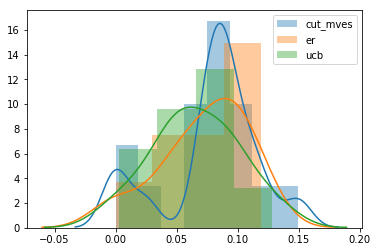

In [313]:
print(f)
t = 'cut_mves'
sns.distplot(getattr(sys.modules[__name__], t)[f][batch_idx][:, ack_iter_idx, stat_idx], label=t)
sns.distplot(ucb[0][f][batch_idx][:, ack_iter_idx, stat_idx], label='er')
sns.distplot(ucb[2][f][batch_idx][:, ack_iter_idx, stat_idx], label='ucb')
plt.legend()

In [113]:
mves_condense_chemvae = cs.get_data_mves('/cluster/sj1/bb_opt', 'ei_cond_chemvae')

reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10


In [53]:
mves_chemvae = cs.get_data_mves('/cluster/sj1/bb_opt', 'chemvae_mves')

reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10


In [54]:
mves_chemvae_mix = cs.get_data_mves('/cluster/sj1/bb_opt', 'chemvae_mves_ei_mix')

reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10


In [48]:
ucb_chemvae = cs.get_data_ucb('/cluster/sj1/bb_opt', 'chemvae')

reading 0
read 0 samples
reading 1
read 0 samples
reading 2
read 0 samples
reading 3
read 0 samples
reading 4
read 0 samples


In [50]:
batch_idx = 1
ack_iter_idx = -1
stat_idx = -4
f = 'chemvae'

In [55]:
try:
    data = mves_condense_chemvae[f][batch_idx]
    arr = data[:, ack_iter_idx, stat_idx]
    print('ei*2:', data.shape[0], np.mean(arr), np.std(arr), np.median(arr), np.median(data[:, ack_iter_idx, -5]))
except Exception as e:
    print(e)
    
try:
    data = mves_chemvae_mix[f][batch_idx]
    arr = data[:, ack_iter_idx, stat_idx]
    print('mves_ei_mix:', data.shape[0], np.mean(arr), np.std(arr), np.median(arr), np.median(data[:, ack_iter_idx, -5]))
except Exception as e:
    print(e)
     p
try:
    data= mves_chemvae[f][batch_idx]
    arr = data[:, ack_iter_idx, stat_idx]
    print('mves:', data.shape[0], np.mean(arr), np.std(arr), np.median(arr), np.median(data[:, ack_iter_idx, -5]))
except Exception as e:
    print(e)


ucb_coeffs2 = [0.0, 0.5, 1.0]
for i in range(len(ucb_coeffs2)):
    try:
        if len(ucb_chemvae[i][f][batch_idx]) != 0:
            arr = ucb_chemvae[i][f][batch_idx][:, ack_iter_idx, stat_idx]
            print('ucb:', ucb_coeffs2[i], ucb_chemvae[i][f][batch_idx].shape[0], np.mean(arr), np.std(arr), np.median(arr), np.median(ucb_chemvae[i][f][batch_idx][:, ack_iter_idx, -5]))
    except Exception as e:
        pass

ei*2: 10 0.004851644 0.0027221178 0.003809142 2.8603437
mves_ei_mix: 10 0.0059743384 0.0041802125 0.005012029 2.8044257
mves: 6 0.00020048115 0.00030624002 0.0 2.394831
